In [123]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
from os import listdir
from os.path import isfile, join
from random import shuffle
import os
import sys
import seaborn as sns

In [124]:
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

from src import utils

In [125]:
df = pd.read_csv('../clean_messages.csv')

In [126]:
df.head()

,Unnamed: 0,msg_type,msg_content,sender_name,msg_sent_time,msg_dist_type,time_thread_start,reply_count,reply_users_count,reply_users,tm_thread_end,channel,clean_msg_content
0,0,message,<!here> we're on gmeet...if you're online join us,Judith Bolton,1.663140e+09,broadcast,0.000000e+00,0,0,0,0.000000e+00,NaN,<!here> we'r gmeet...if onlin join us
1,1,message,<@U03UH397319> <https://anderfernandez.com/en/...,Judith Bolton,1.663142e+09,user,0.000000e+00,0,0,0,0.000000e+00,NaN,<@u03uh397319> <https://anderfernandez.com/en/...
2,2,message,when running your API try `python3 -m uvicorn ...,Judith Bolton,1.663142e+09,text,0.000000e+00,0,0,0,0.000000e+00,NaN,run api tri `python3 -m uvicorn main:app --rel...
3,3,message,Well received with thanks <@U03UJGP0C68>,Brenda Hernandez,1.663142e+09,text,0.000000e+00,0,0,0,0.000000e+00,NaN,well receiv thank <@u03ujgp0c68>
4,4,message,Good afternoon everyone. I am sorry for having...,Brian Odom,1.663151e+09,text,1.663151e+09,2,2,"U03UH397319,U03UJKJGRAQ",1.663154e+09,NaN,good afternoon everyone. sorri miss meet earli...


In [127]:
#Create a timestamp column
df["Timestamp"] = pd.to_datetime(df["msg_sent_time"], unit='s')

In [128]:
#Create a date column
df['Date'] = df['Timestamp'].dt.date

In [129]:
#Group by date and aggregate the messages sent on that day
result_df = df.groupby('Date').agg({'msg_content': lambda x: ' '.join(str(v) for v in x) if pd.notna(x.name) else ''}).reset_index()

In [130]:
result_df.head()

,Date,msg_content
0,2022-08-20,I am glad to make it to the week 1-4 program. ...
1,2022-08-21,Hello everyone. I'm very happy to be here and ...
2,2022-08-22,Is there an easy way to automatically add all ...
3,2022-08-23,<!here> All questions related to the weekly ch...
4,2022-08-24,How do trees get online?\n\nThey just log in. ...


In [131]:
#change all messages to lowercase
result_df['msg_content'] = result_df['msg_content'].apply(lambda x: x.lower())
#remove non alphanumeric characters
result_df['msg_content'] = result_df['msg_content'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))
#remove extra spaces
result_df['msg_content'] = result_df['msg_content'].apply(lambda x: re.sub(' +',' ',x))
#remove leading and trailing spaces
result_df['msg_content'] = result_df['msg_content'].apply(lambda x: x.strip())
 # remove all single characters
result_df['msg_content']= result_df['msg_content'].apply(lambda x: re.sub(r'\s+[a-zA-Z]\s+', ' ', x))

In [132]:
from textblob import TextBlob

sentiments = []

for week, week_data in result_df.iterrows():
    blob = TextBlob(week_data['msg_content'])
    sentiment = blob.sentiment.polarity
    sentiments.append({'Week': week, 'Sentiment': sentiment})

sentiments_df = pd.DataFrame(sentiments)


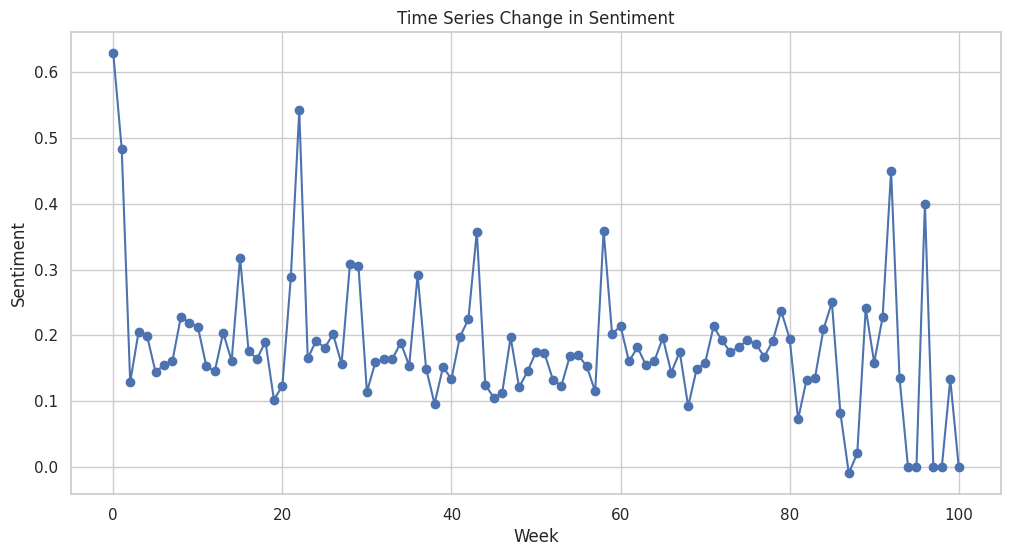

In [133]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(sentiments_df['Week'], sentiments_df['Sentiment'], marker='o')
plt.title('Time Series Change in Sentiment')
plt.xlabel('Week')
plt.ylabel('Sentiment')
plt.grid(True)
plt.show()